# Corpora Process

### Dataload


In [136]:
# dowdload the corpora from ./corpora/ and process them into a dataframe

import pandas as pd
import os
import re
import nltk
from nltk.corpus import stopwords
# form ./corpara/avengersendgame.csv download the corpora
# and process them into a dataframe
def corpora_load(file_name):
    # read the file
    file = pd.read_csv('./corpora/'+file_name)
    # get the text column and remove the null value
    file = file[file['text'].notnull()]
    # get the text column
    file = file['text']
    # return the dataframe
    return file


corpora_0 = corpora_load('RussiaUkraineConflict.csv')
corpora_1 = corpora_load('TheTrumpArchive.csv')
print(corpora_1[1000])

Republican Burgess Owens Defeats Democrat Rep. Ben McAdams in Utah https://t.co/H9NlPQj5yb via @BreitbartNews Great going Burgess, you continue to be a STAR!


### Word Type Counts

In [137]:
# sum the counts of different word for corpora_0 and corpora_1
def corpora_word_count(corpora):
    # combine all the word into one set
    word_set = set()
    # get the word set
    corpora.apply(lambda x: word_set.update(x.split()))
    # remove the word have other characters
    word_set = set([word for word in word_set if re.match(r'^\w+$', word)])
    # return the sum of word counts
    return len(word_set)
# print the sum of word type counts for corpora_0 and corpora_1
print(corpora_word_count(corpora_0))
print(corpora_word_count(corpora_1))
# sum word roken counts for corpora_0 and corpora_1
def corpora_token_count(corpora):
    # get the word token counts
    token_count = corpora.apply(lambda x: len(x.split()))
    # return the sum of word token counts
    return token_count.sum()
# print the sum of word token counts for corpora_0 and corpora_1
print(corpora_token_count(corpora_0))
print(corpora_token_count(corpora_1))



76457
28010
1057389
1108064


### Word Counts

In [138]:
import matplotlib.pyplot as plt
# compute word counts for corpora_0 and corpora_1
def word_count(corpora):
    # create a dictionary to store the word counts
    word_count = {}
    # for each sentence in the corpora
    for sentence in corpora:
        # split the sentence into words
        words = sentence.split()
        # for each word in the sentence
        for word in words:
            # if the word is not in the dictionary
            if word not in word_count:
                # add the word to the dictionary and set the count to 1
                word_count[word] = 1
            # if the word is in the dictionary
            else:
                # add 1 to the count
                word_count[word] += 1
    # return the dictionary
    return word_count
word_count_0 = word_count(corpora_0)
word_count_1 = word_count(corpora_1)
print(word_count_0['russia'])


60


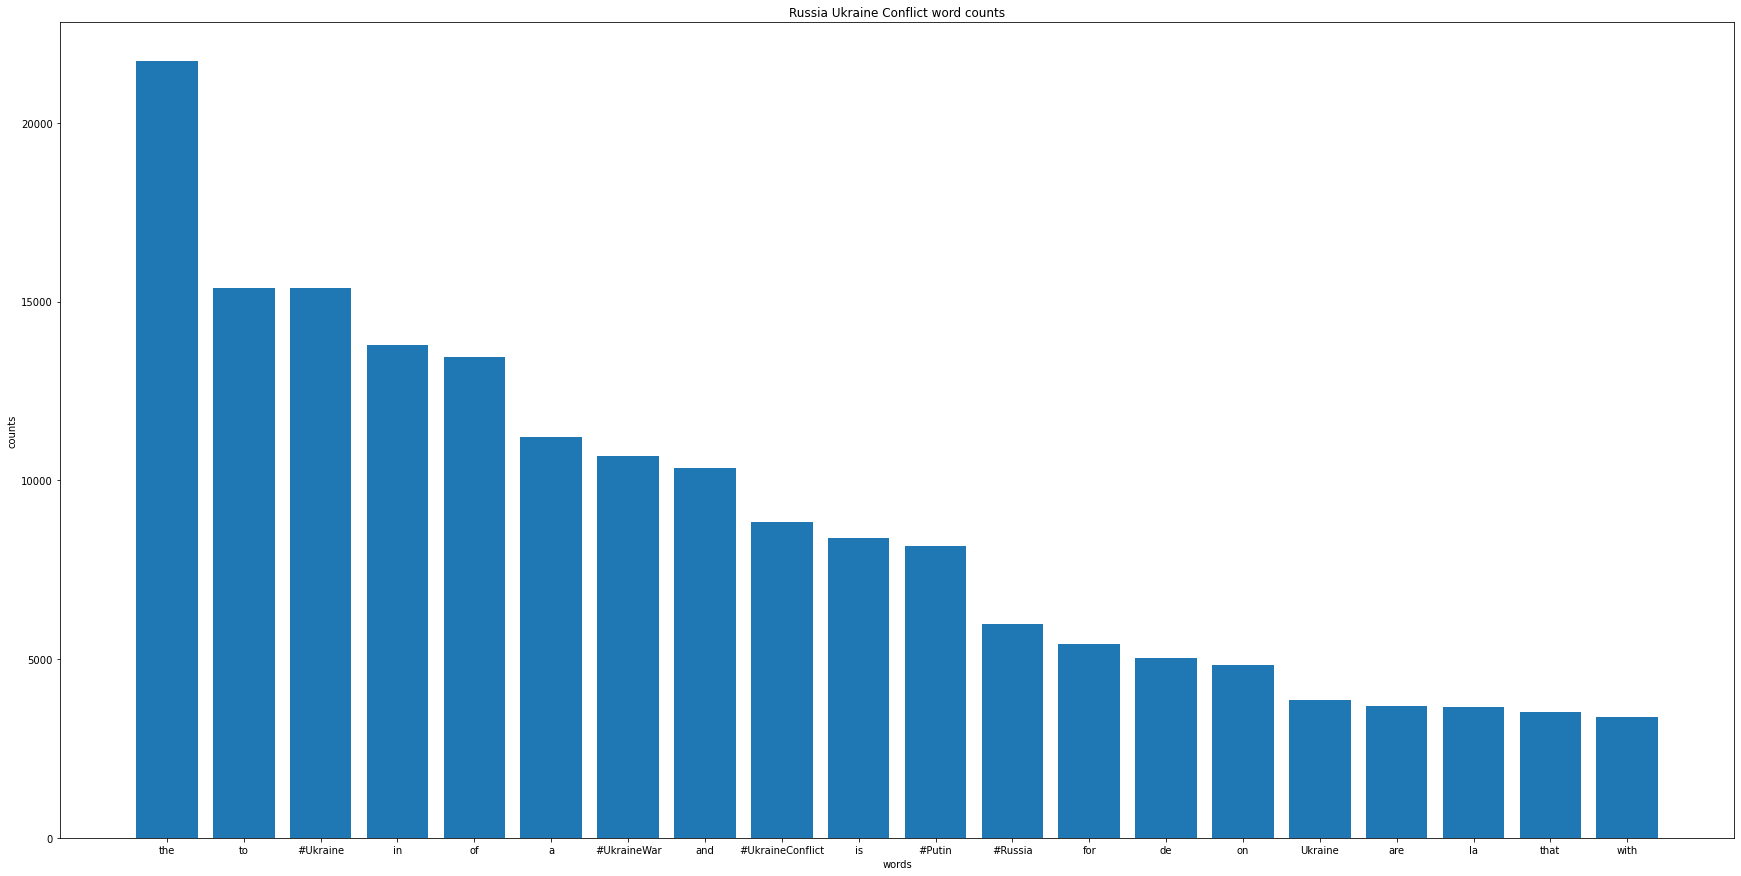

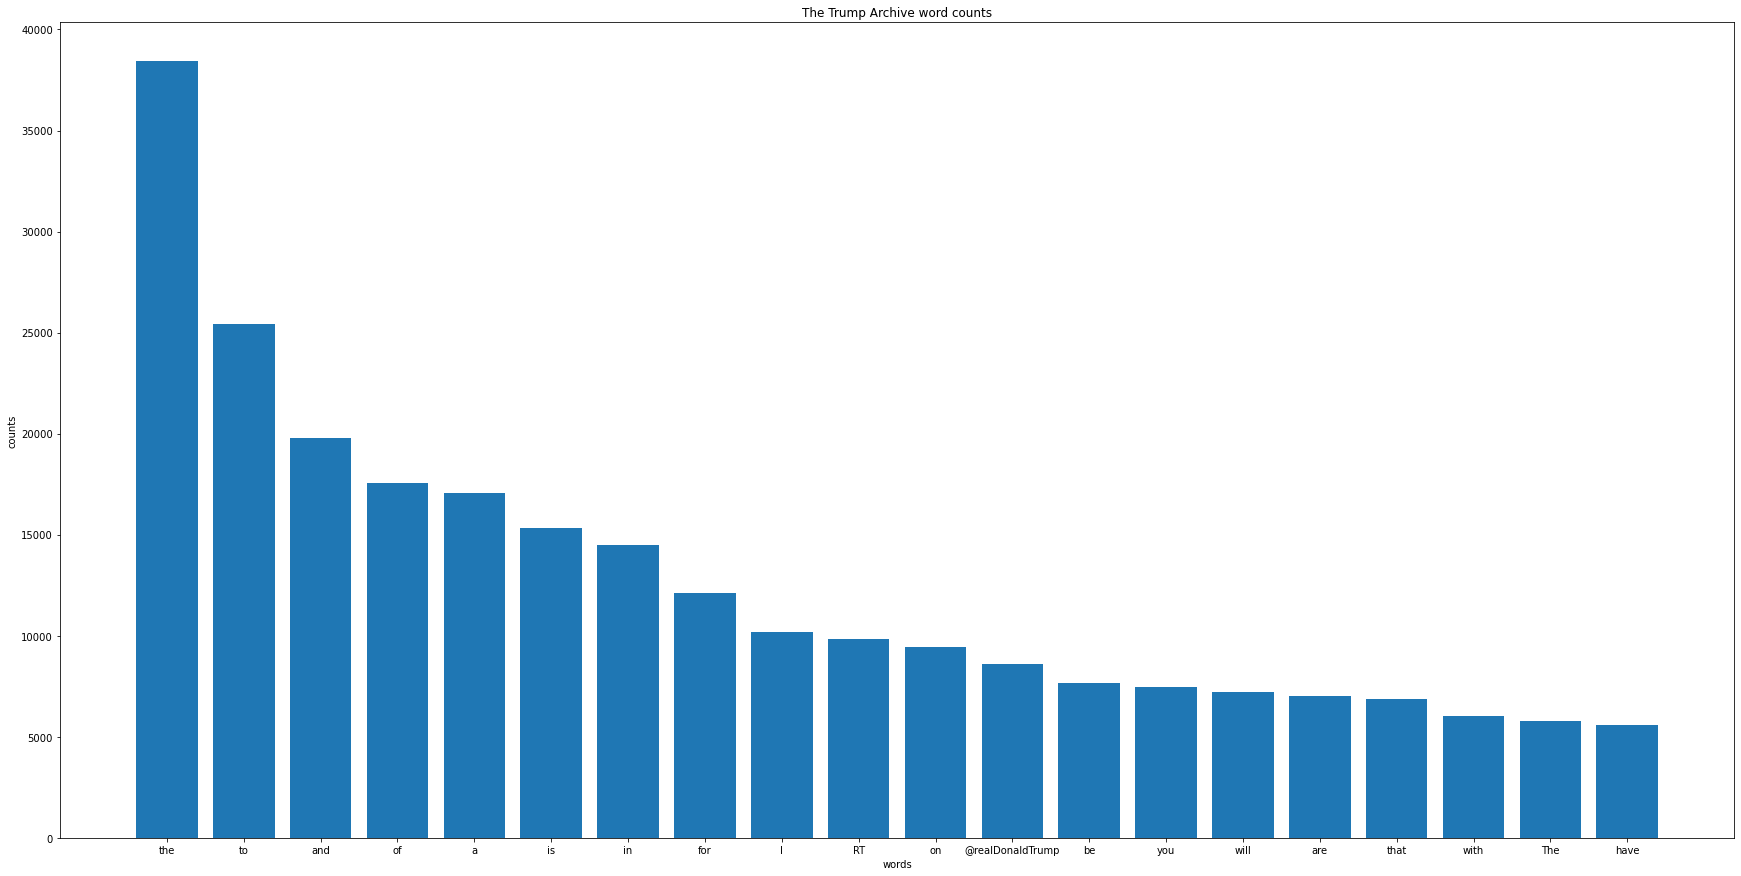

In [139]:

# plot the 20 of the most word counts for corpora_0 and corpora_1
# make sure to label the x and y axis and give the plot a title which describes what it is such as "avengersendgame word counts" and "thetrumparchive word counts"
# and show the plot

# sort the word counts
sorted_word_count_0 = sorted(word_count_0.items(), key=lambda x: x[1], reverse=True)
sorted_word_count_1 = sorted(word_count_1.items(), key=lambda x: x[1], reverse=True)
# get the top 10 word counts
ten_word_count_0 = sorted_word_count_0[:10]
ten_word_count_1 = sorted_word_count_1[:10]
# get the words and counts
words_0 = [word[0] for word in ten_word_count_0]
counts_0 = [word[1] for word in ten_word_count_0]
words_1 = [word[0] for word in ten_word_count_1]
counts_1 = [word[1] for word in ten_word_count_1]
# plot the word counts
plt.figure(figsize=(30, 15))
plt.bar(words_0, counts_0)
plt.xlabel('words')
plt.ylabel('counts')
plt.title('Russia Ukraine Conflict word counts')
plt.show()
plt.figure(figsize=(30, 15))
plt.bar(words_1, counts_1)
plt.xlabel('words')
plt.ylabel('counts')
plt.title('The Trump Archive word counts')
plt.show()

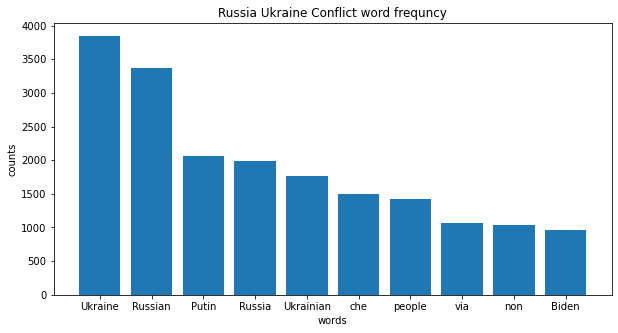

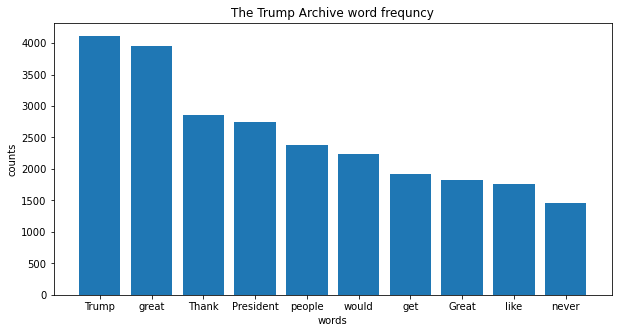

In [149]:
# remove the stop words from the word counts
# and plt the 10 of the most word counts for corpora_0 and corpora_1
# make sure to label the x and y axis and give the plot a title which describes what it is such as "avengersendgame word counts" and "thetrumparchive word counts"
# and show the plot
# remove the http from the word counts

def remove_stop_words(word_count):
    # get the stop words
    stop_words_en = set(stopwords.words('english'))
    stop_words_fr = set(stopwords.words('french'))
    stop_words_ge = set(stopwords.words('german'))
    # combine the stop words
    stop_words = stop_words_en.union(stop_words_fr)
    stop_words = stop_words.union(stop_words_ge)
    stop_words.add('I')
    stop_words.add('The')
    stop_words.add('It')
    stop_words.add('We')
    stop_words.add('A')
    stop_words.add('And')
    stop_words.add('-')
    stop_words.add('RT')
    stop_words.add('They')
    stop_words.add('He')
    stop_words.add('This')
    stop_words.add('In')
    stop_words.add('You')
    stop_words.add('If')
    stop_words.add('So')
    stop_words.add('di')
    stop_words.add('die')
    # remove the stop words from the word counts
    word_count = {word: count for word, count in word_count.items() if word not in stop_words}
    # remove the http* from the word counts
    word_count = {word: count for word, count in word_count.items() if re.match(r'^\w+$', word) and len(word) > 1}
    # return the word counts
    return word_count
new_word_count_0 = remove_stop_words(word_count_0)
new_word_count_1 = remove_stop_words(word_count_1)
# sort the word counts
sorted_word_count_0 = sorted(new_word_count_0.items(), key=lambda x: x[1], reverse=True)
sorted_word_count_1 = sorted(new_word_count_1.items(), key=lambda x: x[1], reverse=True)
# get the top 10 word counts
ten_word_count_0 = sorted_word_count_0[:10]
ten_word_count_1 = sorted_word_count_1[:10]
# get the words and counts
words_0 = [word[0] for word in ten_word_count_0]
counts_0 = [word[1] for word in ten_word_count_0]
words_1 = [word[0] for word in ten_word_count_1]
counts_1 = [word[1] for word in ten_word_count_1]
# plot the word counts
plt.figure(figsize=(10, 5))
plt.bar(words_0, counts_0)
plt.xlabel('words')
plt.ylabel('counts')
plt.title('Russia Ukraine Conflict word frequncy')
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(words_1, counts_1)
plt.xlabel('words')
plt.ylabel('counts')
plt.title('The Trump Archive word frequncy')
plt.show()

###  Sentence Lengths

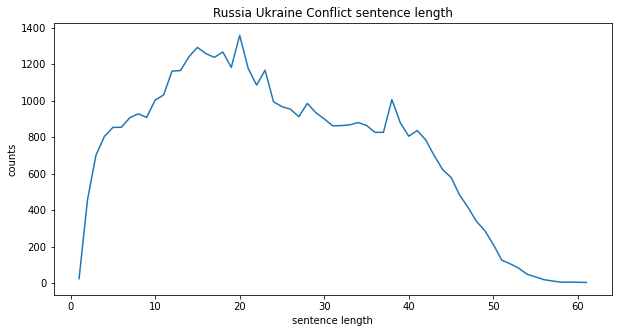

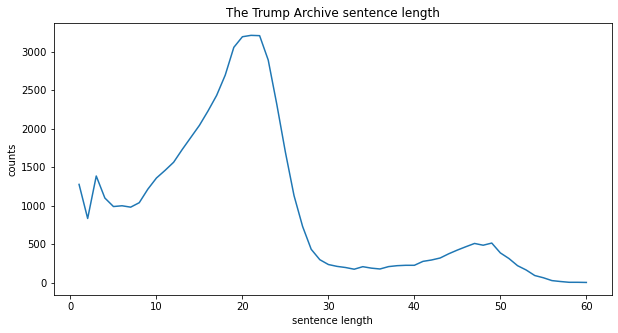

In [155]:
# statistics for the sentence lengths for corpora_0 and corpora_1
# make sure to label the x and y axis and give the plot a title which describes what it is such as "avengersendgame sentence length" and "thetrumparchive sentence length"
# and show the plot line chart
# get the counts of sentence length for corpora_0 and corpora_1
def sentence_length(corpora):
    # create a dictionary to store the sentence length counts
    sentence_length = {}
    # for each sentence in the corpora
    for sentence in corpora:
        # get the length of the sentence
        length = len(sentence.split())
        # if the length is not in the dictionary
        if length not in sentence_length:
            # add the length to the dictionary and set the count to 1
            sentence_length[length] = 1
        # if the length is in the dictionary
        else:
            # add 1 to the count
            sentence_length[length] += 1
    # return the dictionary
    return sentence_length
sentence_length_0 = sentence_length(corpora_0)
sentence_length_1 = sentence_length(corpora_1)
# sort the sentence length counts
sorted_sentence_length_0 = sorted(sentence_length_0.items(), key=lambda x: x[0], reverse=False)
sorted_sentence_length_1 = sorted(sentence_length_1.items(), key=lambda x: x[0], reverse=False)
# get the sentence lengths and counts
lengths_0 = [length[0] for length in sorted_sentence_length_0]
counts_0 = [length[1] for length in sorted_sentence_length_0]
lengths_1 = [length[0] for length in sorted_sentence_length_1]
counts_1 = [length[1] for length in sorted_sentence_length_1]
# plot the sentence length counts
plt.figure(figsize=(10, 5))
plt.plot(lengths_0, counts_0)
plt.xlabel('sentence length')
plt.ylabel('counts')
plt.title('Russia Ukraine Conflict sentence length')
plt.show()
plt.figure(figsize=(10, 5))
plt.plot(lengths_1, counts_1)
plt.xlabel('sentence length')
plt.ylabel('counts')
plt.title('The Trump Archive sentence length')
plt.show()

In [142]:
import numpy as np
# get the sentence lengths for corpora_0 and corpora_1
# and print the mean sentence length for corpora_0 and corpora_1
def all_sentence_lengths(corpora):
    # create a list to store the sentence lengths
    sentence_lengths = []
    # for each sentence in the corpora
    for sentence in corpora:
        # get the length of the sentence
        length = len(sentence.split())
        # add the length to the list
        sentence_lengths.append(length)
    # return the list
    return sentence_lengths
all_lengths_0 = all_sentence_lengths(corpora_0)
all_lengths_1 = all_sentence_lengths(corpora_1)
print('The mean sentence length for corpora_0 is', np.mean(all_lengths_0))
print('The mean sentence length for corpora_1 is', np.mean(all_lengths_1))
print('The median sentence length for corpora_0 is', np.median(all_lengths_0))
print('The median sentence length for corpora_1 is', np.median(all_lengths_1))

The mean sentence length for corpora_0 is 23.991219312973634
The mean sentence length for corpora_1 is 19.58713828640116
The median sentence length for corpora_0 is 23.0
The median sentence length for corpora_1 is 19.0


### Word Combinations

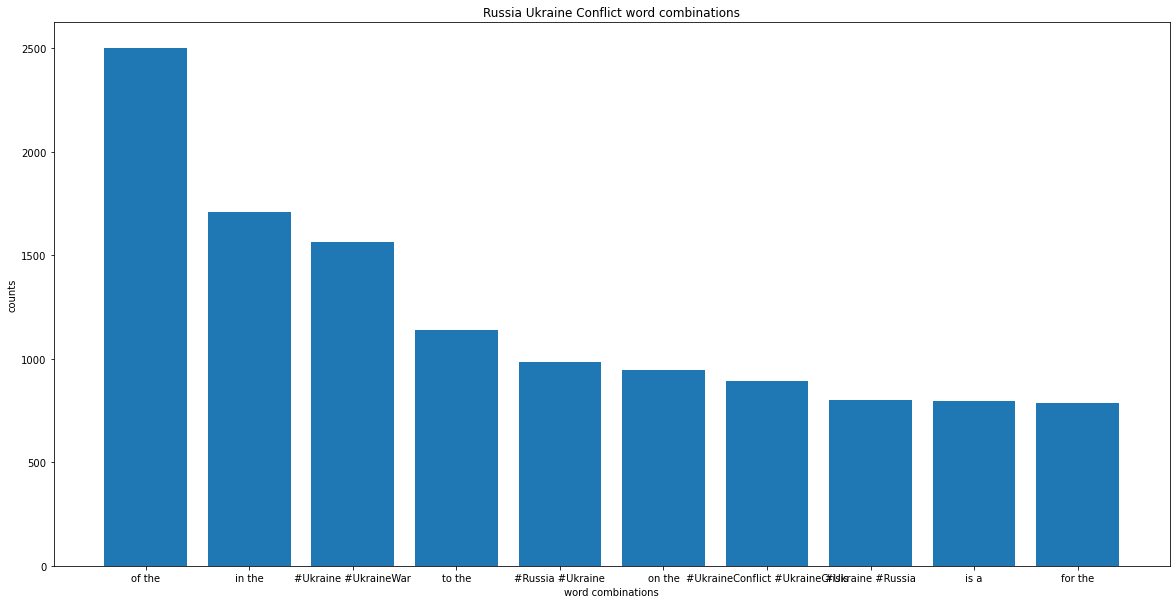

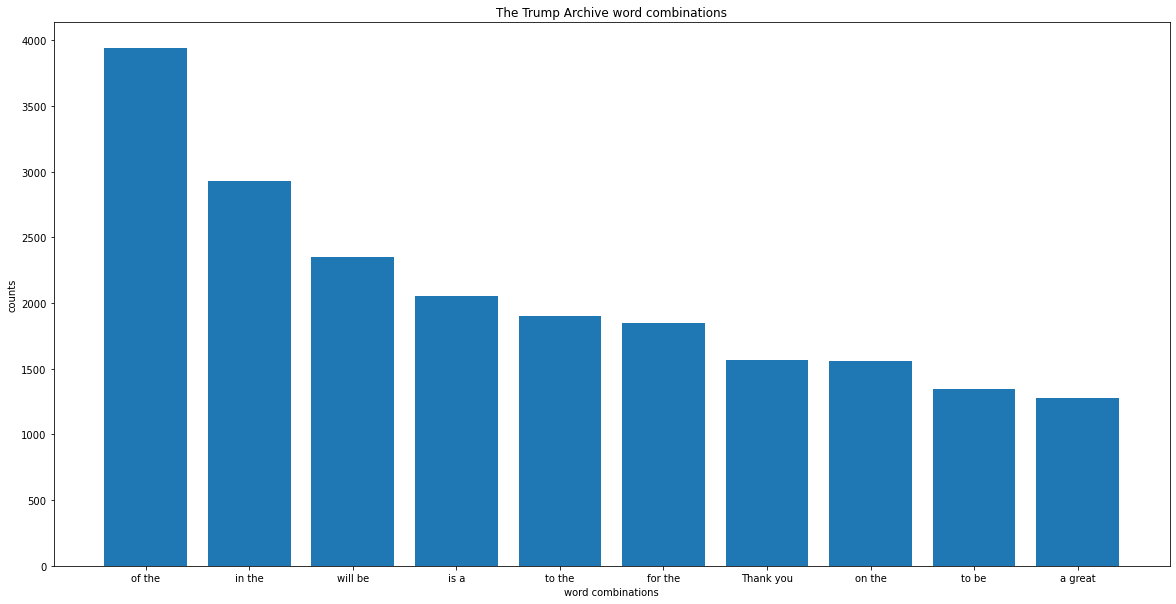

In [151]:
# word combinations for corpora_0 and corpora_1
# make sure to label the x and y axis and give the plot a title which describes what it is such as "avengersendgame word combinations" and "thetrumparchive word combinations"
# get the counts of word combinations for corpora_0 and corpora_1
def word_combinations(corpora):
    # create a dictionary to store the word combination counts
    word_combinations = {}
    # for each sentence in the corpora
    for sentence in corpora:
        # get the words in the sentence
        words = sentence.split()
        # for each word in the sentence
        for i in range(len(words) - 1):
            # get the word combination
            combination = words[i] + ' ' + words[i + 1]
            # if the combination is not in the dictionary
            if combination not in word_combinations:
                # add the combination to the dictionary and set the count to 1
                word_combinations[combination] = 1
            # if the combination is in the dictionary
            else:
                # add 1 to the count
                word_combinations[combination] += 1
    # return the dictionary
    return word_combinations
word_combinations_0 = word_combinations(corpora_0)
word_combinations_1 = word_combinations(corpora_1)
# sort the word combination counts
sorted_word_combinations_0 = sorted(word_combinations_0.items(), key=lambda x: x[1], reverse=True)
sorted_word_combinations_1 = sorted(word_combinations_1.items(), key=lambda x: x[1], reverse=True)
# get the top 10 word combination counts
ten_word_combinations_0 = sorted_word_combinations_0[:10]
ten_word_combinations_1 = sorted_word_combinations_1[:10]
# get the word combinations and counts
combinations_0 = [combination[0] for combination in ten_word_combinations_0]
counts_0 = [combination[1] for combination in ten_word_combinations_0]
combinations_1 = [combination[0] for combination in ten_word_combinations_1]
counts_1 = [combination[1] for combination in ten_word_combinations_1]
# plot the word combination counts
plt.figure(figsize=(20, 10))
plt.bar(combinations_0, counts_0)
plt.xlabel('word combinations')
plt.ylabel('counts')
plt.title('Russia Ukraine Conflict word combinations')
plt.show()
plt.figure(figsize=(20, 10))
plt.bar(combinations_1, counts_1)
plt.xlabel('word combinations')
plt.ylabel('counts')
plt.title('The Trump Archive word combinations')
plt.show()

### Letter Distributions

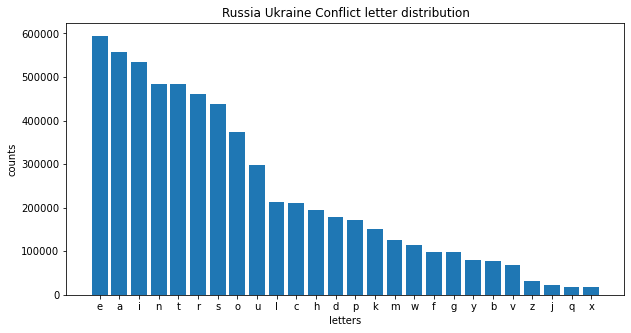

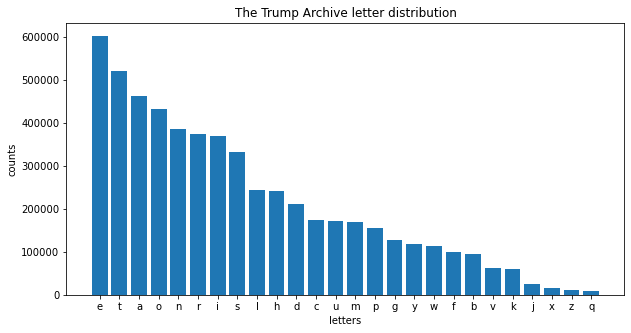

In [153]:
# only statistic 26 letters distribution for corpora_0 and corpora_1
# make sure to label the x and y axis and give the plot a title which describes what it is such as "avengersendgame letter distribution" and "thetrumparchive letter distribution"
# get the counts of letters for corpora_0 and corpora_1
# get all letter lowercase
def letter_distribution(corpora):
    # create a dictionary to store the letter counts
    def is_letter(letter):
        return letter in 'abcdefghijklmnopqrstuvwxyz'
    letter_distribution = {}
    # for each sentence in the corpora
    for sentence in corpora:
        # get the letters in the sentence
        letters = sentence.lower()
        # for each letter in the sentence
        for letter in letters:
            # if the letter is not in the dictionary
            if is_letter(letter):
                if letter not in letter_distribution:
                    # add the letter to the dictionary and set the count to 1
                    letter_distribution[letter] = 1
                # if the letter is in the dictionary
                else:
                    # add 1 to the count
                    letter_distribution[letter] += 1
    # return the dictionary
    return letter_distribution

letter_distribution_0 = letter_distribution(corpora_0)
letter_distribution_1 = letter_distribution(corpora_1)
# sort the letter counts
sorted_letter_distribution_0 = sorted(letter_distribution_0.items(), key=lambda x: x[1], reverse=True)
sorted_letter_distribution_1 = sorted(letter_distribution_1.items(), key=lambda x: x[1], reverse=True)
# get the letters and counts
letters_0 = [letter[0] for letter in sorted_letter_distribution_0]
counts_0 = [letter[1] for letter in sorted_letter_distribution_0]
letters_1 = [letter[0] for letter in sorted_letter_distribution_1]
counts_1 = [letter[1] for letter in sorted_letter_distribution_1]
# plot the letter counts
plt.figure(figsize=(10, 5))
plt.bar(letters_0, counts_0)
plt.xlabel('letters')
plt.ylabel('counts')
plt.title('Russia Ukraine Conflict letter distribution')
plt.show()
plt.figure(figsize=(10, 5))
plt.bar(letters_1, counts_1)
plt.xlabel('letters')
plt.ylabel('counts')
plt.title('The Trump Archive letter distribution')
plt.show()